# Veri Ön İşleme
* Veri mi Model mi ? tabi ki veri!
* Makine öğrenmesi modelinin amacı genellenebilir yapılar ortaya koymaktadır. Belirli olaylar gözlendiğinde belirli tahmin sonuçları vermektir.
* Eğer veriniz kötü ise, makine öprenmesi araçlarınız kullanışsız olacaktır.
-------------------
# Veri Temizleme (Data cleaning/cleasing)
* Gürültülü Veri(erkeğin hamile olması, bir bebek biberonun 1 miliyon lira olması )
* Eksik Veri Analizi (Eksik kısım)
* Aykırı Gözlem Analizi (Veride ki aykırılıklar mesela 1 miliyon km üzerinde olamaz araba km si )
------------------------
# Veri Standardizasyonu
* 0-1 Dönüşümü
* z-skoruna dönüştürme
* Logaritmik Dönüşüm
-----------------
# Veri İndirgeme
* Gözlem sayısının azaltılması
* Değişken sayısının azaltılması
-----------------------------
# Değişken Dönüşümleri
* Sürekli değişkenlerde dönüşümler
* Kategorik değişkenlerde dönüşümler

# Aykırı Gözlem Analizi
* Veride genel eğilimin oldukça dışına çıkan ya da diğer gözlemelerden oldukça farklı olan gözlemlere aykırı gözlem denir.
* Aykırılığı ifade eden nümerik değer aykırı değer denir.
* Aykırı değeri barındıran gözlem birimine aykırı gözlem denir. 
* (Outlayers, aşırı değer, uç değer, sıradışı değer gibi isimleri var)

# Neye göre Kime göre aykırı gözlem ?

### Veri setinin genel eğiliminin dışına çıkmayı nasıl tanımlarız ? 
##### Not : Eğer kurulan modelin bir genelleme kaygısı varsa(ki olmalı!) ; zaten çok seyrek olan senoryalar ve genele uymayan yapıları çalışmanın dışında bırakmak gerekir.

* Sektör bilgisi (bir ev fiyat tahmin modelinde 1000 metrekarelik evleri modellemeye almamak! )

* Standart Sapma Yaklaşımı: Bir değişkenin ortalaması üzerine aynı değişkenin standart sapması hesaplanarak eklenir. 1,2 ya da 3 SS değeri ortalama üzerine eklenerek ortaya çıkan bu değer eşik değer olarak düşünülür ve bu değerden yukarıda ya da aşağıda olan değerler aykırı değer olarak tanımlanır.

* Z-skoru yaklaşımı: SS yöntemine benzer şekilde çalışır. değiken standart normal dağılıma uyarlanır, yani standartlaştırılır. Sonrasında -örneğin- dağılımın sağından ve solundan -+25 değerine göre bir eşik değer konulurve bu değerin üzerinde ya da altında olan değerler aykırı değer olarak işaretlenir.

* Boxplot(interquartile range IQR) yöntemi : En sık kullanılan yönetmlerden birisidir. Değikenin değerleri küçükten büyüğe sıralanır. Çeyrekliklerine (yüzdeliklerine) yani Q1,Q3 değerlerine karşılık değerler üzerinden bir eşik değer hesaplanır ve bu eşik değere göre aykırı değer tanımı yapılır.
* IQR = 1,5 x (Q3-Q1)
* Alt Eşik değer = Q1-IQR
* Üst Eşik değer = Q3+IQR

# Aykırı değerleri yakalamak

In [1]:
import seaborn as sns

In [2]:
df= sns.load_dataset('diamonds')


In [3]:
df = df.select_dtypes(include=['float64', 'int64'])

In [4]:
df= df.dropna()

In [5]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df.table

In [14]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<Axes: xlabel='table'>

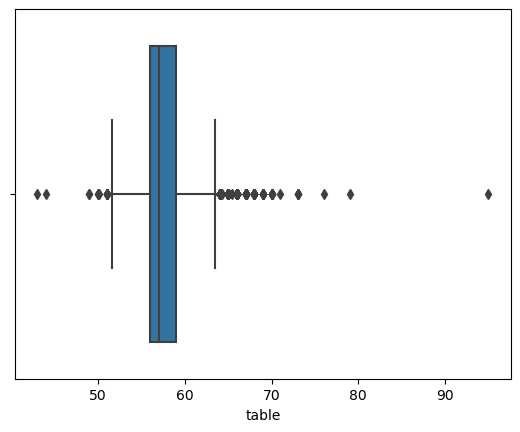

In [15]:
sns.boxplot(x= df_table)

In [16]:
Q1 = df_table.quantile(0.25)
Q3= df_table.quantile(0.75)
IQR = Q3-Q1

In [20]:
Q1

56.0

In [21]:
IQR

3.0

In [23]:
alt_sinir = Q1 - 1.5*IQR

In [24]:
alt_sinir

51.5

In [25]:
ust_sinir = Q3 + 1.5*IQR

In [26]:
ust_sinir

63.5

In [28]:
(df_table < alt_sinir )| (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [29]:
aykiri_tf= (df_table < alt_sinir )

In [37]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [38]:
df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

# Aykırı Değer Problemini Çözme
* Silebiliriz
* Ortalama ile doldurabiliriz
* Baskılayabiliriz

# Silme


In [49]:
import pandas as pd

In [50]:
df_table = pd.DataFrame(df_table)

In [52]:
df_table.shape

(53940, 1)

In [57]:
t_df = df_table[~ ( ( (df_table) < (alt_sinir) ) | ( ( df_table ) >  ( ust_sinir ) ) ).any(axis=1) ]

In [60]:
t_df.shape

(53335, 1)

# Ortalama ile Doldurma

In [61]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include= ['float64', 'int64'])

In [62]:
df= df.dropna()

In [63]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [64]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [65]:
df_table.mean()

table    57.457184
dtype: float64

In [66]:
df_table[aykiri_tf] = df_table.mean()

In [67]:
df_table[aykiri_tf]

,table
1515,57.457184
3238,57.457184
3979,57.457184
4150,57.457184
5979,57.457184
7418,57.457184
8853,57.457184
11368,57.457184
22701,57.457184
25179,57.457184


# Baskılama
* üstteyse üst sınır değerine, alttaysa alt sınır değerine çeviririz.

In [68]:
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include= ['float64', 'int64'])

In [69]:
df= df.dropna()

In [70]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [71]:
df_table = df.table

In [72]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [73]:
alt_sinir

51.5

In [74]:
df_table[aykiri_tf]= alt_sinir

C:\Users\ycanf\AppData\Local\Temp\ipykernel_7828\2335413180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf]= alt_sinir


In [75]:
df_table[aykiri_tf]

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

In [77]:
df_table[aykiri_tf_ust] = ust_sinir

C:\Users\ycanf\AppData\Local\Temp\ipykernel_7828\2209933085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf_ust] = ust_sinir


In [78]:
df_table[aykiri_tf_ust]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64

<Axes: xlabel='table'>

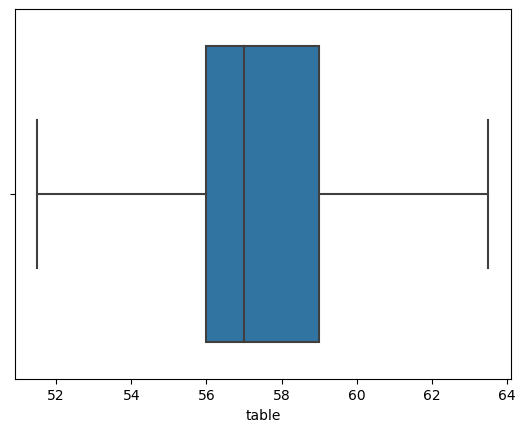

In [79]:
sns.boxplot(x=df_table)

# Çok değişkenli Aykırı Gözlem Analizi
### Local Outlier Factor
* Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

* Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla  burada bir kşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [1]:
import pandas as pd
import seaborn as sns

In [5]:
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include= ['float64', 'int64'])
df=diamonds.copy()

In [6]:
df= df.dropna()

In [35]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [9]:
clf = LocalOutlierFactor(n_neighbors= 20, contamination= 0.1 )

In [11]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [12]:
df_scores= clf.negative_outlier_factor_

In [28]:
np.sort(df_scores)[0:100]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375,
       -3.45066056, -3.42193513, -3.40044967, -3.36779427, -3.35007989,
       -3.32557427, -3.29322345, -3.22070216, -3.19253942, -3.17216736,
       -3.16270895, -3.0900127 , -3.08096113, -3.07879797, -3.06943824,
       -3.0581048 , -3.03756565, -3.02610611, -2.96150262, -2.92133335,
       -2.8910913 , -2.87232591, -2.86404215, -2.85995025, -2.80025433,
       -2.7948162 , -2.79239569, -2.78583061, -2.77804997, -2.76102085,
       -2.75883433, -2.75256915, -2.74570485, -2.74088344, -2.7403423 ,
       -2.72989973, -2.70536052, -2.69880894, -2.69427748, -2.6924846 ,
       -2.69161777, -2.68605044, -2.68516533, -2.67055326, -2.65343817,
       -2.63856312, -2.63766905, -2.63517466, -2.63306792, -2.63

In [30]:
esik_deger= np.sort(df_scores)[13]

In [31]:
aykiri_tf = df_scores > esik_deger

In [32]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
yeni_df = df[df_scores > esik_deger]

In [34]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
df[df_scores < esik_deger]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


# Baskılama

In [37]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [38]:
baski_deger= df[df_scores == esik_deger]

In [57]:
baski_deger

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [43]:
aykirilar = df[~aykiri_tf]

In [44]:
aykirilar

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [45]:
aykirilar.to_records(index=False)

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [55]:
res =aykirilar.to_records(index=False)

In [56]:
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [50]:
res[:] = baski_deger.to_records(index=False)

In [51]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [52]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [53]:
df[~aykiri_tf] = pd.DataFrame(res, index= df[~aykiri_tf].index)

In [54]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19
